In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [17]:
url = 'C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/boston_housing.csv'
#df = pd.read_csv(url, index_col='datetime', parse_dates=True)
df = pd.read_csv(url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
#using all the variables

X = df.loc[:, df.columns != 'PRICE']
y = df['PRICE']

X_std = (X - X.mean()) / X.std()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_std, y)
print(lr.score(X_std, y))
print(list(zip(X, lr.coef_)))

0.7406426641094094
[('CRIM', -0.9006815457331921), ('ZN', 0.9929592634161717), ('INDUS', 0.13760287819389203), ('CHAS', 0.6817987675536928), ('NOX', -2.057906307405253), ('RM', 2.6701965026328542), ('AGE', 0.017537263642767215), ('DIS', -3.0838783940445), ('RAD', 2.582440122206411), ('TAX', -0.8344591947592396), ('PTRATIO', -2.0467856827882445), ('B', 0.5744594083197359), ('LSTAT', -3.6522886279094293), ('PREDICTION', 1.4127723943157482)]


In [22]:
coeffs = pd.DataFrame({
    'Variable': X_std.columns,
    'Weight'  : lr.coef_
}).sort_values(by='Weight', ascending=False)
coeffs

,Variable,Weight
5,RM,2.670197
8,RAD,2.582440
13,PREDICTION,1.412772
1,ZN,0.992959
3,CHAS,0.681799
11,B,0.574459
2,INDUS,0.137603
6,AGE,0.017537
9,TAX,-0.834459
0,CRIM,-0.900682


In [ ]:
#cross validation
#Training your data (bias (underfitting)  vs. variance (overfitting) tradeoff)

In [23]:
df['PREDICTION'] = lr.predict(X_std)

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


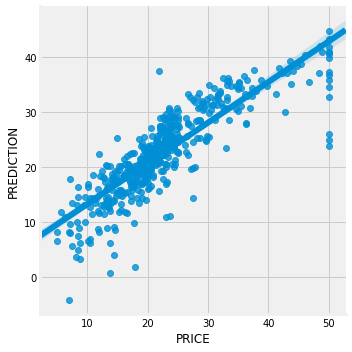

In [26]:
sns.lmplot(x='PRICE', y='PREDICTION', data=df);

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=2019)

In [32]:
X_train.shape
X_test.shape

(102, 14)

In [36]:
y_train.shape
y_test.shape

(102,)

In [38]:
print('Training Score: ', lr.score(X_train,y_train), "test score: " , lr.score(X_test, y_test))

Training Score:  0.7581321815069204 test score:  0.6174065999127879


In [37]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7581321815069204 0.6174065999127879


In [ ]:
#Kfold cross vaildation
#Only happens on the training set, training splits don't change between rounds

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)

In [72]:
scores

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [73]:
np.mean(scores)

0.7275668192780947

In [74]:
np.std(scores)

0.07839580317172476

In [49]:
#log transforamtions
y_log = np.log1p(y)

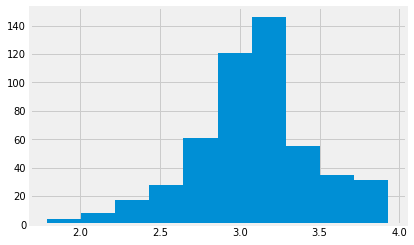

In [54]:
y_log.hist();

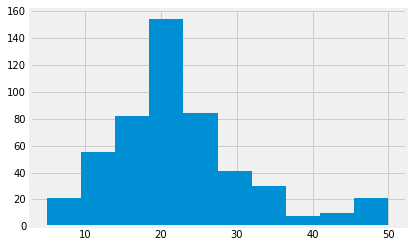

In [55]:
y.hist();

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std, y_log, test_size=0.2, random_state=2019)

In [64]:
scores2 = cross_val_score(estimator=lr,X=X_train2,y=y_train2,cv=10)

In [65]:
scores2

array([0.81066965, 0.78080019, 0.78969268, 0.72301188, 0.72305225,
       0.81510248, 0.84755808, 0.81720277, 0.69862075, 0.79529768])

In [79]:
print('no log: ',np.mean(scores))
print('log y: ',np.mean(scores2))

no log:  0.7275668192780947
log y:  0.7801008400068823


In [80]:
print('no log:',np.std(scores))
print('log y: ',np.std(scores2))

no log: 0.07839580317172476
log y:  0.046435688027733686


In [85]:
lr.predict(X_train2)

array([24.6159128 , 23.66657294, 18.05423825, 19.78839302, 25.00326556,
       18.29208278,  5.65450289, 42.32610182, 21.84457369, 23.44283014,
       27.99961052, 15.06538651, 24.66413964, 21.86983267, 21.18280393,
        8.20676789, 27.27751559, 17.11766763,  9.30277911,  4.64074773,
       23.96465392, 19.15813563, 23.22264072, 37.12245301, 34.5958727 ,
       25.310643  , 23.21419344, 19.94287796, 34.56119627, 18.21561024,
       20.99382502, 18.02042065, 17.85479738, 18.70838873, 24.67672811,
       24.8784294 , 22.90070187, 25.23214202, 24.58693023, 22.70176952,
       37.21030535, 22.38318857, 19.54245965, 14.54469681, 20.9460741 ,
       32.81601454,  4.68197378, 28.73413744, 13.3140138 , 12.66796354,
       25.60997412, 10.46928862, 17.49502678, 19.29869744, 25.49557342,
       22.88280437, 38.63070222, 18.32744238, 24.21834539, 13.17395042,
       31.40148349, 24.54087038, 21.38249287, 24.48155379, 13.54383684,
       15.49711596, 26.01854476, 10.74933659, 26.55124979, 17.63

In [86]:
lr.predict(X_test2)

array([20.33192034, 30.56150855, 11.42198946, 16.8970806 , 27.01912782,
       12.77729555, 25.41460999, 23.95267008, 33.79154132, 33.50126749,
       25.05429557, 31.66430227, 19.98285258, 12.4616218 , -6.66297423,
       23.36867493, 14.92932538, 44.05472038, 22.81669548,  3.72098139,
       31.25746504, 20.68406647, 22.9425323 , 19.37448096, 12.91699241,
       32.99373116, 21.81521649, 24.14498433, 18.41220509, 31.15685856,
       16.76006243, 22.72843014, 19.40334092, 28.75501841, 17.70196598,
       17.23717678, 18.22754471, 13.96560217, 28.73279778, 20.19961892,
       36.2948616 , 17.91369056, 21.34274873, 20.02922409, 31.41285753,
       32.01264434, 22.77358347, 35.02549046, 16.89214363,  3.59801458,
       21.16194967, 23.74010706, 16.04165109, 28.36558986, 25.12232923,
       23.44071444, 19.97735813, 33.37129595, 14.00816978, 19.54187977,
       22.52890094, 25.30659334, 12.14810149, 16.59211993, 13.73365327,
       30.68379456, 31.574453  , 28.95691257,  8.72573318, 28.99

In [88]:
#winner gets fit on all the data
lr.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
#and then all the fitted data gets scored against the training set
lr.score(X_test2,y_test2)

0.6860541958593196

In [ ]:
#regularization
#modern way to multiple resgression on large dataset (good for variable selection)
#deliberatley injecting bias into model called a penalty
#gradients of decent uses regularization


In [96]:
from sklearn.linear_model import Ridge
rreg = Ridge()

In [102]:
#creatin gvalues of alpha between 10 to-4 and 10 to the 4th 
alphas = np.logspace(-4,4,9)

rreg_scores = []

for alpha in alphas:
    rreg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=rreg,X=X_train2,y=y_train2,cv=10)
    rreg_scores.append((np.mean(scores), alpha))
    

In [103]:
rreg_scores

[(0.7801008844495196, 0.0001),
 (0.7801012844046976, 0.001),
 (0.7801052811304602, 0.01),
 (0.7801449670230547, 0.1),
 (0.7805148747022702, 1.0),
 (0.7823433464812654, 10.0),
 (0.7651508796072269, 100.0),
 (0.5754231586669579, 1000.0),
 (0.15950121788371638, 10000.0)]

In [104]:
#best alpha to use is 10

max(rreg_scores)

(0.7823433464812654, 10.0)

In [106]:
from sklearn.linear_model import Lasso
lareg = Lasso()

alphas = np.logspace(-4,4,9)

lareg_scores = []

for alpha in alphas:
    lareg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=lareg,X=X_train2,y=y_train2,cv=10)
    lareg_scores.append((np.mean(scores), alpha))
    

In [107]:
#lower cross validation score, so we wpould use ridge

max(lareg_scores)

(0.7814714113239656, 0.001)

In [108]:
rreg.set_params(alpha=10)
rreg.fit(X_train2, y_train2)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
rreg.score(X_test2, y_test2)

0.6835062596459476